# What are the distribution of points for each position in FPL?

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from convert_points import convert_points

## Read data

In [2]:
data_path = '../data/Fantasy-Premier-League/data/cleaned_merged_seasons.csv'
seasons_df = pd.read_csv(data_path, low_memory = False)
seasons_df

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38


## Process data:

Consider only 2020/21 - 2022/23 seasons:

In [3]:
seasons = ['2020-21', '2021-22', '2022-23']
data_df = seasons_df.loc[seasons_df.season_x.isin(seasons),:]
data_df

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,1.0,32.0,1,0,0,0,55,True,0,1
19853,2020-21,Aaron Cresswell,DEF,West Ham,0,0,11,0,11.2,435,...,0.0,0.0,1,0,0,0,50,True,0,1
19854,2020-21,Aaron Mooy,MID,Brighton,0,0,0,0,0.0,60,...,1.0,0.0,0,0,0,0,50,True,0,1
19855,2020-21,Aaron Ramsdale,GK,Sheffield Utd,0,0,12,0,0.0,483,...,0.0,0.0,1,0,0,0,50,True,0,1
19856,2020-21,Abdoulaye Doucouré,MID,Everton,0,0,20,1,44.6,512,...,0.0,4.0,3,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38


## Which positions earn the most points over the last 3 seasons?

In [4]:
data_df.position = data_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2304734420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.position = data_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})


### Sum total

In [5]:
position_pts = data_df.loc[:,['position','total_points','bonus','bps']].groupby(['position']).sum()
position_pts

,total_points,bonus,bps
position,,,
DEF,30972,2345,162981
FWD,13237,1496,42516
GK,8376,719,42206
MID,42001,2774,163477


C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\3441255881.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\3441255881.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)


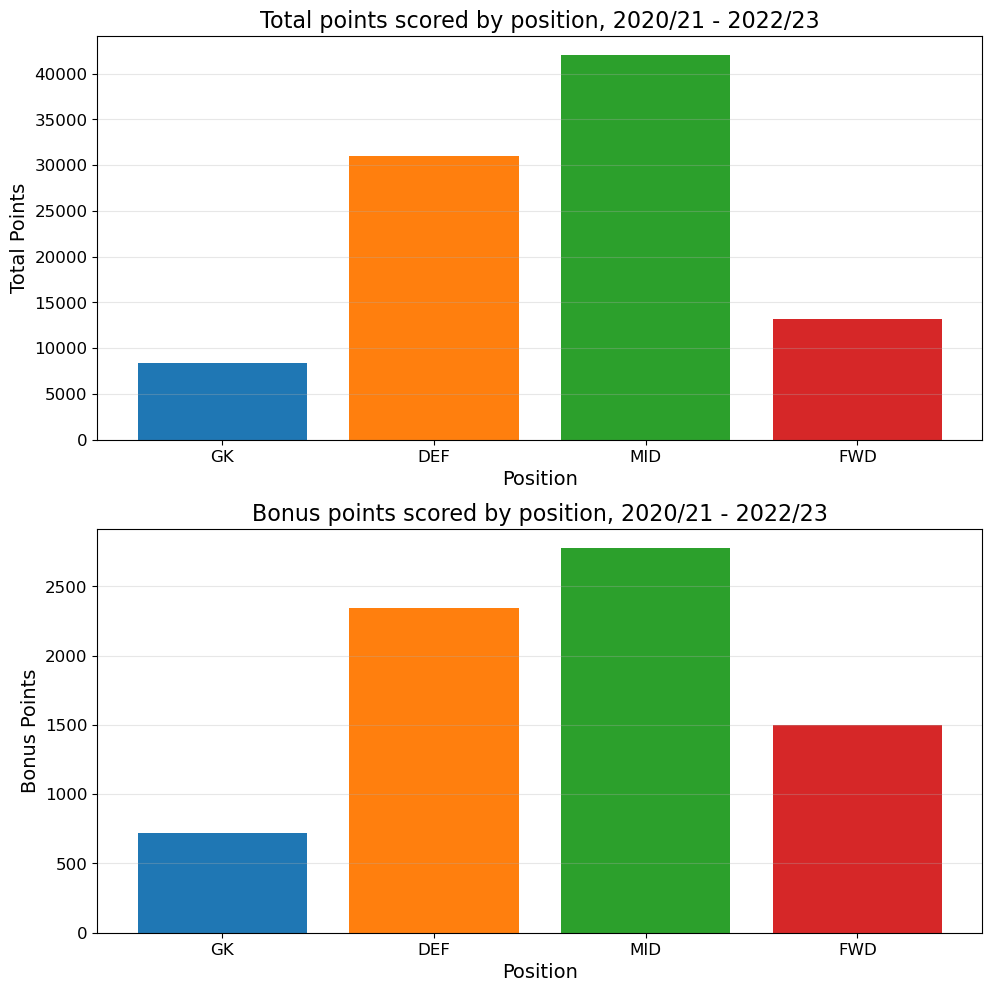

In [6]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows=2,ncols=1,figsize = (10,10))

ax[0].bar(0, position_pts.loc['GK','total_points'])
ax[0].bar(1, position_pts.loc['DEF','total_points'])
ax[0].bar(2, position_pts.loc['MID','total_points'])
ax[0].bar(3, position_pts.loc['FWD','total_points'])
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[0].set_xlabel('Position',fontsize = axis_label_font)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
ax[0].set_ylabel('Total Points',fontsize = axis_label_font)
ax[0].grid(axis='y',alpha=0.3)
ax[0].set_title('Total points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

ax[1].bar(0, position_pts.loc['GK','bonus'])
ax[1].bar(1, position_pts.loc['DEF','bonus'])
ax[1].bar(2, position_pts.loc['MID','bonus'])
ax[1].bar(3, position_pts.loc['FWD','bonus'])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[1].set_xlabel('Position',fontsize = axis_label_font)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
ax[1].set_ylabel('Bonus Points',fontsize = axis_label_font)
ax[1].grid(axis='y',alpha=0.3)
ax[1].set_title('Bonus points scored by position, 2020/21 - 2022/23', fontsize = axis_title_font)

fig.tight_layout(pad = 1.0)
plt.savefig('total_and_bonus_pts_breakdown_per_position.png')

### Mean

In [7]:
mean_position_pts = data_df.loc[:,['position','total_points','bonus','bps']].groupby(['position']).mean()
mean_position_pts

,total_points,bonus,bps
position,,,
DEF,1.171895,0.088728,6.166749
FWD,1.375416,0.155445,4.417706
GK,0.989019,0.084898,4.983587
MID,1.320994,0.087246,5.141595


C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\3127715429.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\3127715429.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)


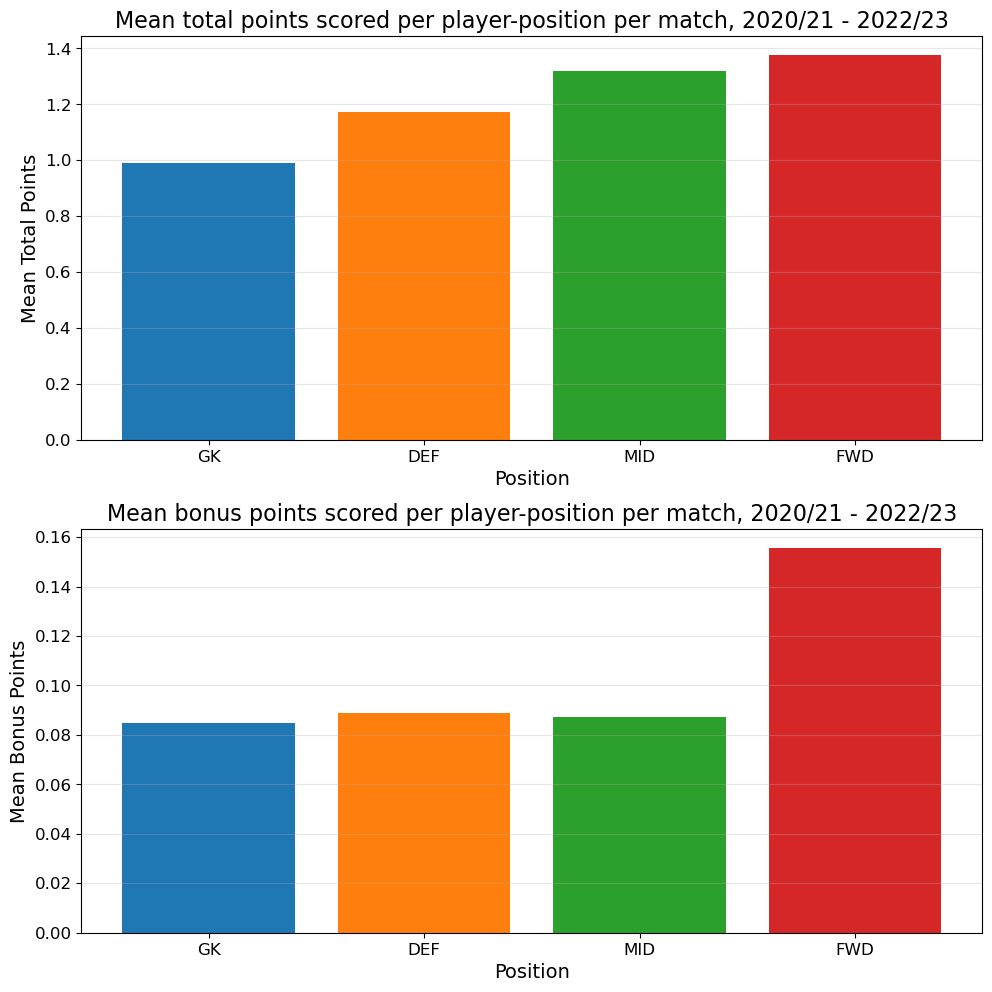

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize = (10,10))

ax[0].bar(0, mean_position_pts.loc['GK','total_points'])
ax[0].bar(1, mean_position_pts.loc['DEF','total_points'])
ax[0].bar(2, mean_position_pts.loc['MID','total_points'])
ax[0].bar(3, mean_position_pts.loc['FWD','total_points'])
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[0].set_xlabel('Position',fontsize = axis_label_font)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
ax[0].set_ylabel('Mean Total Points',fontsize = axis_label_font)
ax[0].grid(axis='y',alpha=0.3)
ax[0].set_title('Mean total points scored per player-position per match, 2020/21 - 2022/23', fontsize = axis_title_font)

ax[1].bar(0, mean_position_pts.loc['GK','bonus'])
ax[1].bar(1, mean_position_pts.loc['DEF','bonus'])
ax[1].bar(2, mean_position_pts.loc['MID','bonus'])
ax[1].bar(3, mean_position_pts.loc['FWD','bonus'])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['GK','DEF','MID','FWD'], fontsize = axis_tick_font)
ax[1].set_xlabel('Position',fontsize = axis_label_font)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
ax[1].set_ylabel('Mean Bonus Points',fontsize = axis_label_font)
ax[1].grid(axis='y',alpha=0.3)
ax[1].set_title('Mean bonus points scored per player-position per match, 2020/21 - 2022/23', fontsize = axis_title_font)

fig.tight_layout(pad = 1.0)
plt.savefig('mean_total_and_bonus_pts_breakdown_per_position.png')

## What's the distribution of these points for each position?

In [9]:
GK_data_df = data_df.loc[data_df.position == 'GK', :]
DEF_data_df = data_df.loc[data_df.position == 'DEF', :]
MID_data_df = data_df.loc[data_df.position == 'MID', :]
FWD_data_df = data_df.loc[data_df.position == 'FWD', :]

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2799219905.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2799219905.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2799219905.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2799219905.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2799219905.py:47: UserWarning: FixedFormatter should only be used tog

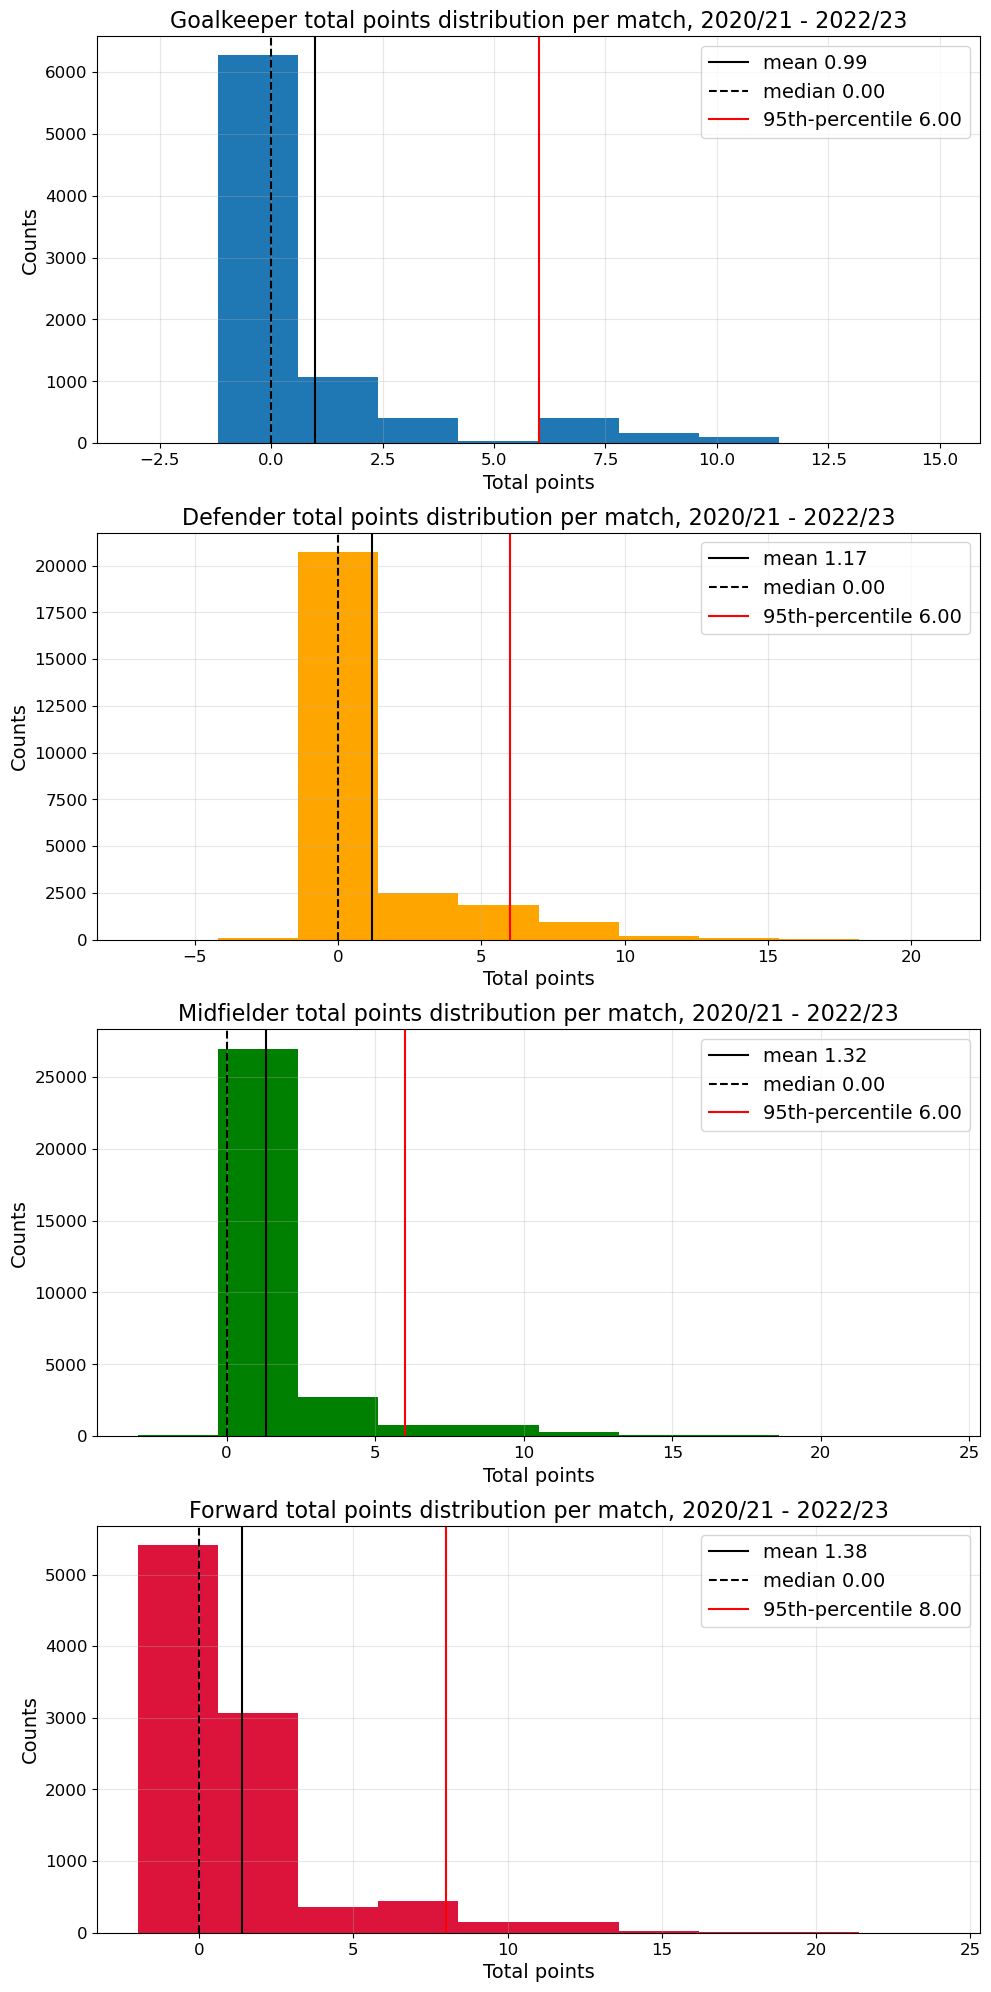

In [10]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,20))

gk_mean = np.mean(GK_data_df.total_points)
gk_med = np.median(GK_data_df.total_points)
gk_95 = np.percentile(GK_data_df.total_points, 95)

ax[0].hist(GK_data_df.total_points)
ax[0].set_title('Goalkeeper total points distribution per match, 2020/21 - 2022/23', fontsize = axis_title_font)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
ax[0].set_ylabel('Counts', fontsize = axis_label_font)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = axis_tick_font)
ax[0].set_xlabel('Total points', fontsize = axis_label_font)
ax[0].axvline(x = gk_mean, color = 'k', label = f'mean {gk_mean:.2f}')
ax[0].axvline(x = gk_med, color = 'k', linestyle='--', label = f'median {gk_med:.2f}')
ax[0].axvline(x = gk_95, color = 'r', linestyle='-', label = f'95th-percentile {gk_95:.2f}')
ax[0].legend(fontsize = legend_font)
ax[0].grid(alpha=0.3)

def_mean = np.mean(DEF_data_df.total_points)
def_med = np.median(DEF_data_df.total_points)
def_95 = np.percentile(DEF_data_df.total_points, 95)

ax[1].hist(DEF_data_df.total_points, color='orange')
ax[1].set_title('Defender total points distribution per match, 2020/21 - 2022/23', fontsize = axis_title_font)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
ax[1].set_ylabel('Counts', fontsize = axis_label_font)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize = axis_tick_font)
ax[1].set_xlabel('Total points', fontsize = axis_label_font)
ax[1].axvline(x = def_mean, color = 'k', label = f'mean {def_mean:.2f}')
ax[1].axvline(x = def_med, color = 'k', linestyle='--', label = f'median {def_med:.2f}')
ax[1].axvline(x = def_95, color = 'r', linestyle='-', label = f'95th-percentile {def_95:.2f}')
ax[1].legend(fontsize = legend_font)
ax[1].grid(alpha=0.3)

mid_mean = np.mean(MID_data_df.total_points)
mid_med = np.median(MID_data_df.total_points)
mid_95 = np.percentile(MID_data_df.total_points, 95)

ax[2].hist(MID_data_df.total_points, color='g')
ax[2].set_title('Midfielder total points distribution per match, 2020/21 - 2022/23', fontsize = axis_title_font)
ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize = axis_tick_font)
ax[2].set_ylabel('Counts', fontsize = axis_label_font)
ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize = axis_tick_font)
ax[2].set_xlabel('Total points', fontsize = axis_label_font)
ax[2].axvline(x = mid_mean, color = 'k', label = f'mean {mid_mean:.2f}')
ax[2].axvline(x = mid_med, color = 'k', linestyle='--', label = f'median {mid_med:.2f}')
ax[2].axvline(x = mid_95, color = 'r', linestyle='-', label = f'95th-percentile {mid_95:.2f}')
ax[2].legend(fontsize = legend_font)
ax[2].grid(alpha=0.3)

fwd_mean = np.mean(FWD_data_df.total_points)
fwd_med = np.median(FWD_data_df.total_points)
fwd_95 = np.percentile(FWD_data_df.total_points, 95)

ax[3].hist(FWD_data_df.total_points, color='crimson')
ax[3].set_title('Forward total points distribution per match, 2020/21 - 2022/23', fontsize = axis_title_font)
ax[3].set_yticklabels(ax[3].get_yticklabels(), fontsize = axis_tick_font)
ax[3].set_ylabel('Counts', fontsize = axis_label_font)
ax[3].set_xticklabels(ax[3].get_xticklabels(), fontsize = axis_tick_font)
ax[3].set_xlabel('Total points', fontsize = axis_label_font)
ax[3].axvline(x = fwd_mean, color = 'k', label = f'mean {fwd_mean:.2f}')
ax[3].axvline(x = fwd_med, color = 'k', linestyle='--', label = f'median {fwd_med:.2f}')
ax[3].axvline(x = fwd_95, color = 'r', linestyle='-', label = f'95th-percentile {fwd_95:.2f}')
ax[3].legend(fontsize = legend_font)
ax[3].grid(alpha=0.3)

fig.tight_layout(pad=1.0)
plt.savefig('total_points_distribution_per_position.png')

## How are these points scored?

In [11]:
points_data = data_df.drop(columns = ['season_x', 'name', 'team_x', 'bps',
                                      'creativity', 'element', 'fixture',
                                     'ict_index','influence','kickoff_time',
                                     'opponent_team', 'opp_team_name','round',
                                     'selected', 'team_a_score', 'team_h_score',
                                     'threat', 'transfers_balance', 'transfers_in',
                                     'transfers_out', 'value', 'was_home', 'GW'])

In [12]:
points_data = points_data[['position', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'saves',
                          'penalties_saved', 'penalties_missed', 'goals_conceded', 'yellow_cards',
                          'red_cards', 'own_goals', 'bonus', 'total_points']]
points_data

,position,minutes,goals_scored,assists,clean_sheets,saves,penalties_saved,penalties_missed,goals_conceded,yellow_cards,red_cards,own_goals,bonus,total_points
19852,FWD,45,0,0,0,0,0,0,2,0,0,0,0,1
19853,DEF,90,0,0,0,0,0,0,2,0,0,0,0,1
19854,MID,0,0,0,0,0,0,0,0,0,0,0,0,0
19855,GK,90,0,0,0,2,0,0,2,0,0,0,0,1
19856,MID,90,0,0,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,MID,90,0,0,0,0,0,0,1,0,0,0,0,2
96165,DEF,0,0,0,0,0,0,0,0,0,0,0,0,0
96166,DEF,0,0,0,0,0,0,0,0,0,0,0,0,0
96167,MID,0,0,0,0,0,0,0,0,0,0,0,0,0


### GK

In [13]:
GK_points_data = points_data.loc[points_data.position == 'GK',:]
GK_points_data.drop(columns = 'position', inplace = True)
GK_points_data = convert_points('GK', GK_points_data)
GK_mean_points_data = GK_points_data.mean(axis=0)
GK_mean_points_data

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2924666732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GK_points_data.drop(columns = 'position', inplace = True)


minutes             0.539143
goals_scored        0.000708
assists             0.003188
clean_sheets        0.304168
saves               0.175227
penalties_saved     0.024796
penalties_missed    0.000000
goals_conceded     -0.125635
yellow_cards       -0.013579
red_cards          -0.001063
own_goals          -0.002834
bonus               0.084898
total_points        0.989019
dtype: float64

### DEF

In [14]:
DEF_points_data = points_data.loc[points_data.position == 'DEF',:]
DEF_points_data.drop(columns = 'position', inplace = True)
DEF_points_data = convert_points('DEF', DEF_points_data)
DEF_mean_points_data = DEF_points_data.mean(axis=0)
DEF_mean_points_data

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\1779710603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEF_points_data.drop(columns = 'position', inplace = True)


minutes             0.754739
goals_scored        0.090355
assists             0.069129
clean_sheets        0.401983
saves               0.000000
penalties_saved     0.000000
penalties_missed    0.000000
goals_conceded     -0.161830
yellow_cards       -0.058004
red_cards          -0.007151
own_goals          -0.006054
bonus               0.088728
total_points        1.171895
dtype: float64

### MID

In [15]:
MID_points_data = points_data.loc[points_data.position == 'MID',:]
MID_points_data.drop(columns = 'position', inplace = True)
MID_points_data = convert_points('MID', MID_points_data)
MID_mean_points_data = MID_points_data.mean(axis=0)
MID_mean_points_data

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\64033275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MID_points_data.drop(columns = 'position', inplace = True)


minutes             0.775971
goals_scored        0.267495
assists             0.153703
clean_sheets        0.098632
saves               0.000000
penalties_saved     0.000000
penalties_missed   -0.002642
goals_conceded      0.000000
yellow_cards       -0.054065
red_cards          -0.003963
own_goals          -0.001384
bonus               0.087246
total_points        1.320994
dtype: float64

### FWD

In [16]:
FWD_points_data = points_data.loc[points_data.position == 'FWD',:]
FWD_points_data.drop(columns = 'position', inplace = True)
FWD_points_data = convert_points('FWD', FWD_points_data)
FWD_mean_points_data = FWD_points_data.mean(axis=0)
FWD_mean_points_data

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\870384259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FWD_points_data.drop(columns = 'position', inplace = True)


minutes             0.711139
goals_scored        0.399418
assists             0.160224
clean_sheets        0.000000
saves               0.000000
penalties_saved     0.000000
penalties_missed   -0.005195
goals_conceded      0.000000
yellow_cards       -0.040732
red_cards          -0.004052
own_goals          -0.000831
bonus               0.155445
total_points        1.375416
dtype: float64

### Plot results

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2375230581.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2375230581.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2375230581.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize = axis_tick_font)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_11144\2375230581.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_yticklabels(ax[3].get_yticklabels(), fontsize = axis_tick_font)


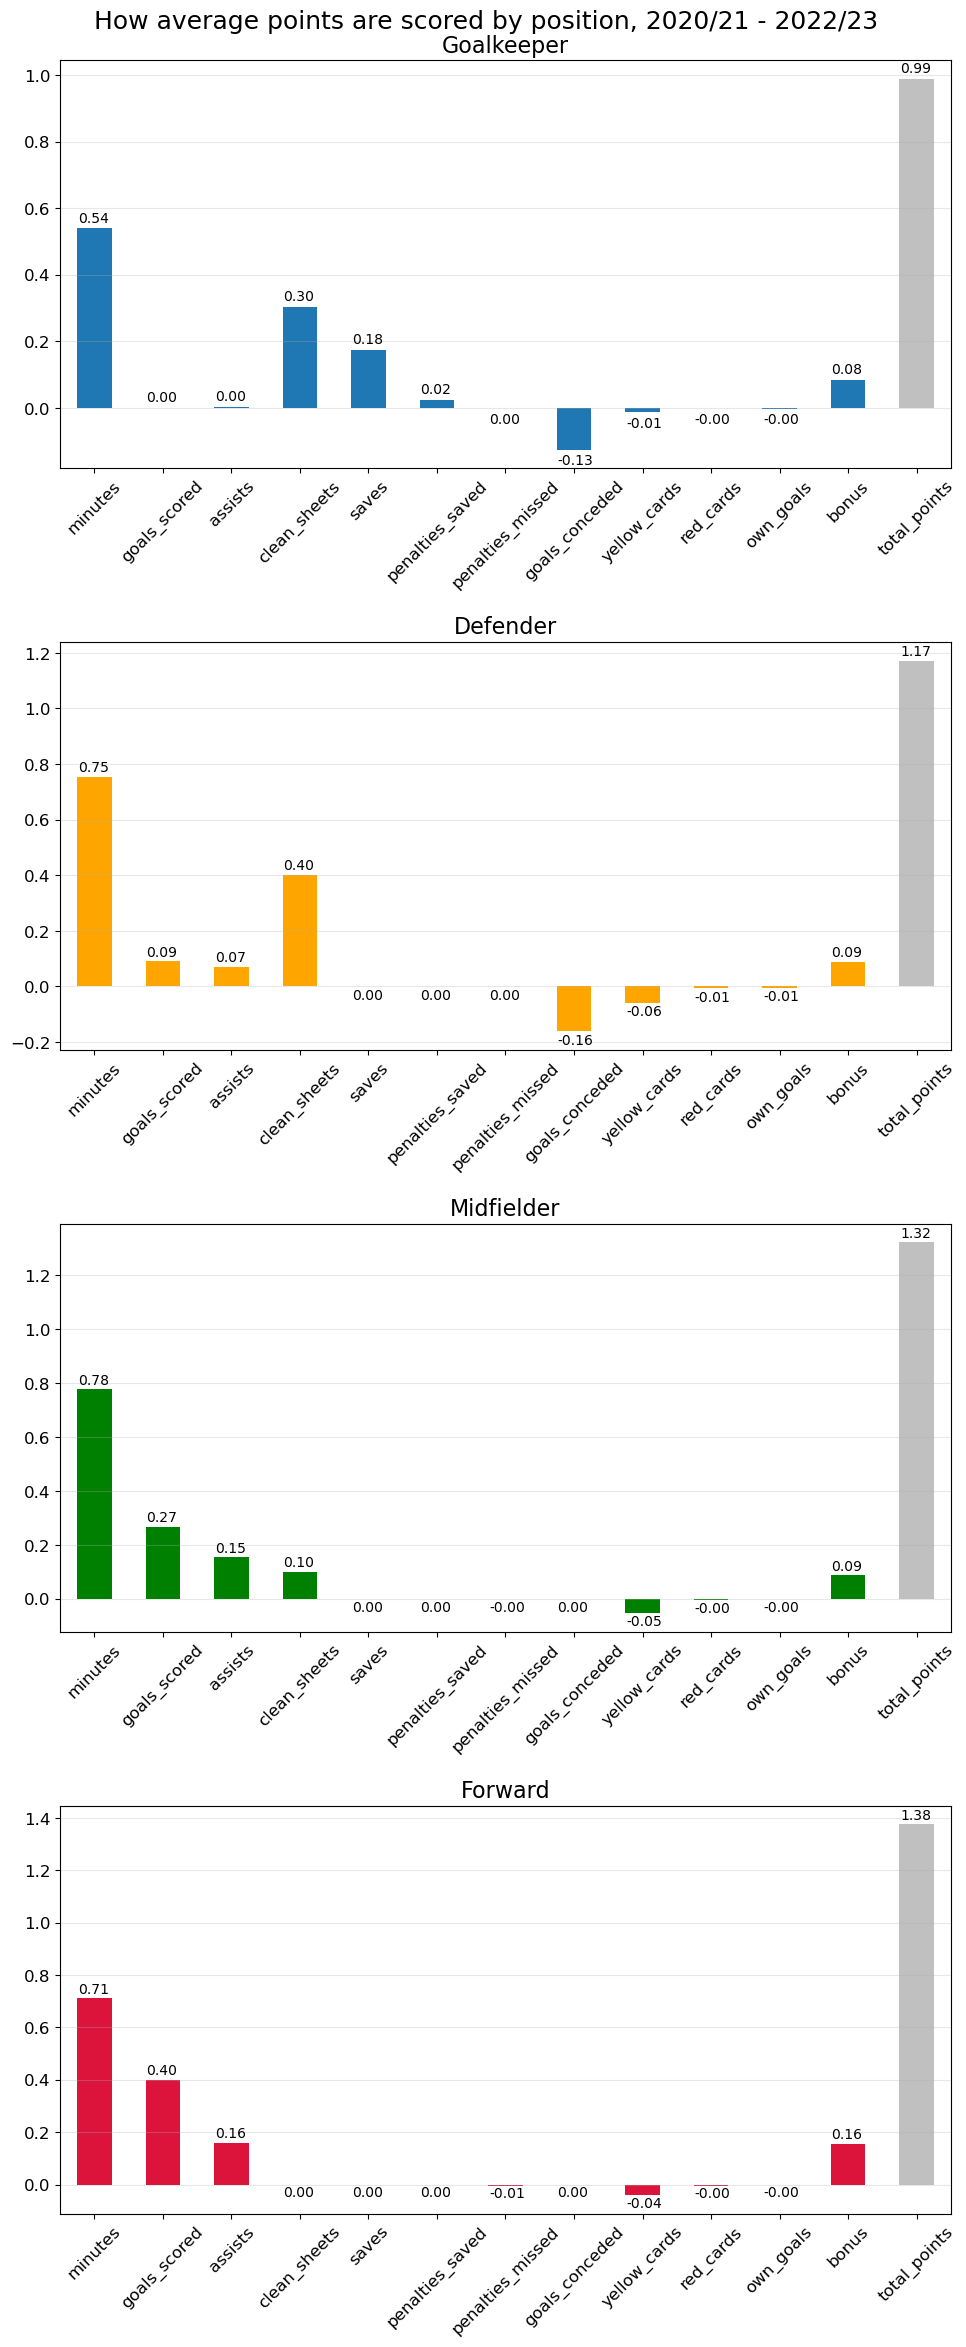

In [17]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,24))

GK_mean_points_data.plot.bar(figure = fig, ax = ax[0], color = ['C0']*12 + ['silver'])
ax[0].set_title('Goalkeeper', fontsize = axis_title_font)
ax[0].grid(axis='y', alpha = 0.3)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
for i, v in enumerate(GK_mean_points_data.values):
    ax[0].text(i-0.24, v+0.02 if v > 0 else v-0.045, f'{v:.2f}')

DEF_mean_points_data.plot.bar(figure = fig, ax = ax[1], color = ['orange']*12 + ['silver'])
ax[1].set_title('Defender', fontsize = axis_title_font)
ax[1].grid(axis='y', alpha = 0.3)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
for i, v in enumerate(DEF_mean_points_data.values):
    ax[1].text(i-0.24, v+0.02 if v > 0 else v-0.045, f'{v:.2f}')

MID_mean_points_data.plot.bar(figure = fig, ax = ax[2], color=['g']*12 + ['silver'])
ax[2].set_title('Midfielder', fontsize = axis_title_font)
ax[2].grid(axis='y', alpha = 0.3)
ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize = axis_tick_font)
for i, v in enumerate(MID_mean_points_data.values):
    ax[2].text(i-0.24, v+0.02 if v > 0 else v-0.045, f'{v:.2f}')

FWD_mean_points_data.plot.bar(figure = fig, ax = ax[3], color=['crimson']*12 + ['silver'])
ax[3].set_title('Forward', fontsize = axis_title_font)
ax[3].grid(axis='y', alpha = 0.3)
ax[3].set_xticklabels(ax[3].get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
ax[3].set_yticklabels(ax[3].get_yticklabels(), fontsize = axis_tick_font)
for i, v in enumerate(FWD_mean_points_data.values):
    ax[3].text(i-0.24, v+0.02 if v > 0 else v-0.045, f'{v:.2f}')

fig.suptitle('How average points are scored by position, 2020/21 - 2022/23', fontsize = title_font)
fig.tight_layout(pad=1.75)
plt.savefig('How_points_are_scored_per_position.png')